0.6
0.2
0.2
Optimal Hyperparams: {'max_depth': 12, 'n_estimators': 25}

Mean 0.783 Standard Deviation 0.126 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.789 Standard Deviation 0.138 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.803 Standard Deviation 0.111 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.802 Standard Deviation 0.117 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.8 Standard Deviation 0.051 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.822 Standard Deviation 0.051 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.82 Standard Deviation 0.037 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.818 Standard Deviation 0.04 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.779 Standard Deviation 0.066 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.803 Standard Deviation 0.028 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.82 Standard Deviation 0.052 Hy

<Figure size 576x432 with 0 Axes>

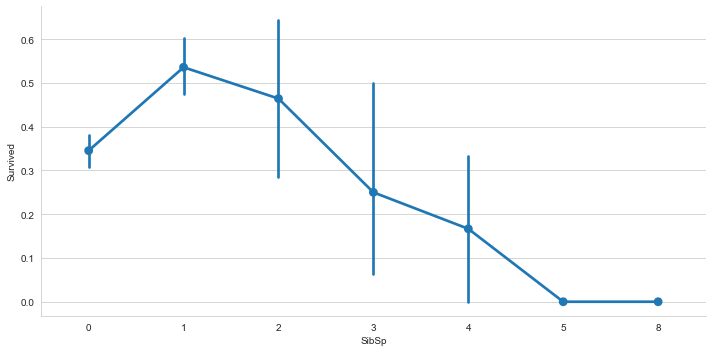

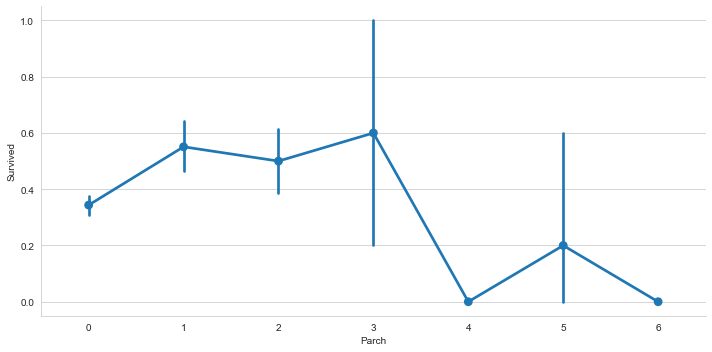

In [11]:
# ------------------------- 0. EDA_Pipeline ------
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score

# Import dataset
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train.csv")
titanic.head()

# Count missing values
titanic.isnull().sum()

# Fill missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2) 
    
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

# Binary Cabin Index
titanic['Cabin_index'] = np.where(titanic['Cabin'].isnull(), 0, 1)

# Sex -> Numeric
sex_numeric = {'male': 0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(sex_numeric)

# More Cleaning
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

# This step can be skiped , importing prepeared cleaned data from csv
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv")
titanic.head()

# Train Test Split
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

# Here order of parameters matters
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

# Save the data
X_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv", index=False)
X_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv", index=False)
X_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv", index=False)

y_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv", index=False)
y_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv", index=False)
y_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv", index=False)

## Cross Validation
train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

rf = RandomForestClassifier()
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)
scores

## Hyperparameter Tuning
rf = RandomForestClassifier()

hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))
    
results(cross_val)

rf1 = RandomForestClassifier(n_estimators=50, max_depth=12)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf3.fit(train_features, train_labels.values.ravel())

## Model Evaluation
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(val_features)
  accuracy = round(accuracy_score(val_labels, y_pred), 3)
  precision = round(precision_score(val_labels, y_pred), 3)
  recall = round(recall_score(val_labels, y_pred), 3)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                rf1.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
    

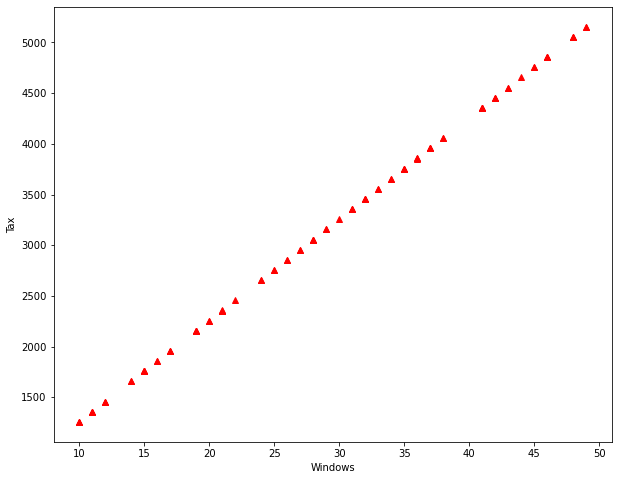

[255.49375784] [[99.9990074]]
0.9999999400098565


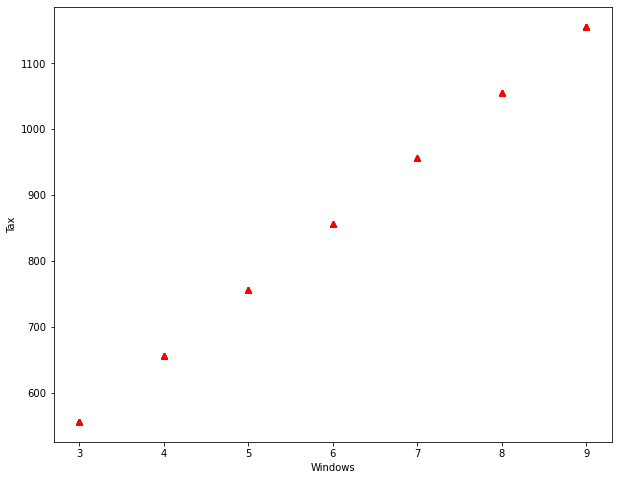

1.0


In [41]:
# ---- --------------------- 1.Linear regression ----------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10,8

windows = np.random.randint(10,50,(100,1))
windows

tax = 256 + 100*windows - abs(np.random.rand(100, 1))
tax[1:10]

plt.plot(windows, tax, 'r^')
plt.xlabel('Windows')
plt.ylabel('Tax')
plt.show()

X = windows
y = tax

LinReg = LinearRegression()
result = LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)     # regression coef.
print(LinReg.score(X, y))                  # score  - it's R2 determination coefficient 

X_new = np.random.randint(3,10,(100, 1))
y_new = LinReg.predict(X_new)              # predict - calc Y_new with regression coefficient for X_new
#X_new[:3]
#Y_new[:3]
plt.plot(X_new, y_new, 'r^')
plt.xlabel('Windows')
plt.ylabel('Tax')
plt.show()
print(LinReg.score(X_new, y_new))

In [6]:
import graphviz

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000
Score (R2):  0.8488812666133723
intercept:  [12707.03448276]
slope:  [[ 770.62314759 2710.00681553]]


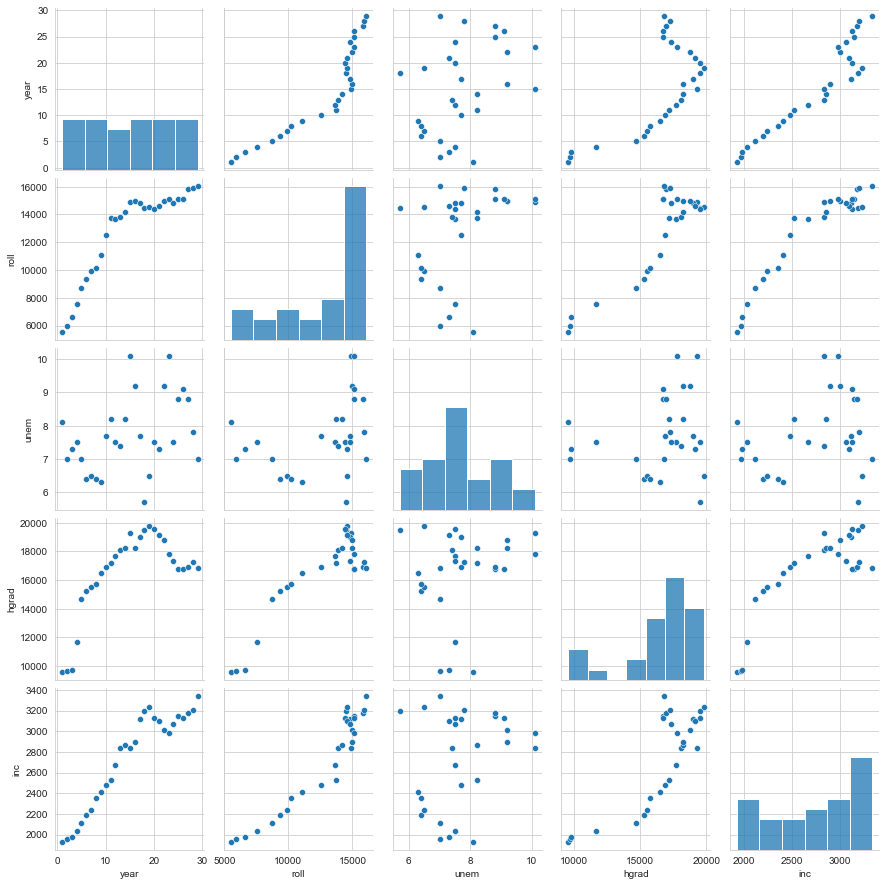

In [67]:
# ---- -------------------- 2.Multiple liner regression ----------------------
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

enrollment = pd.read_csv("C:\\Users\\Asus\\Downloads\\enrollment_forecast.csv")

enrollment.head()
enrollment.columns = ['year', 'roll', 'unem', 'hgrad', 'inc'] # may skip, pandas do it automaticaly while import csv
enrollment.columns

sb.pairplot(enrollment)

print(enrollment.corr())

enrollment_data = enrollment[['unem', 'hgrad']].values  ## values - только значения, т.е. получили ndarray
enrollment_target = enrollment[['roll']].values
enrollment_data_names = ['unem', 'hgrad']

X, y = scale(enrollment_data), enrollment_target

# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 
missing_values

LinReg = LinearRegression()
LinReg.fit(X, y)
print('Score (R2): ',LinReg.score(X, y))
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)


# здесь на оси х значения 1 и 2-го независимого параметра, поэтому точек в 2 раза больше чем наблюдений 

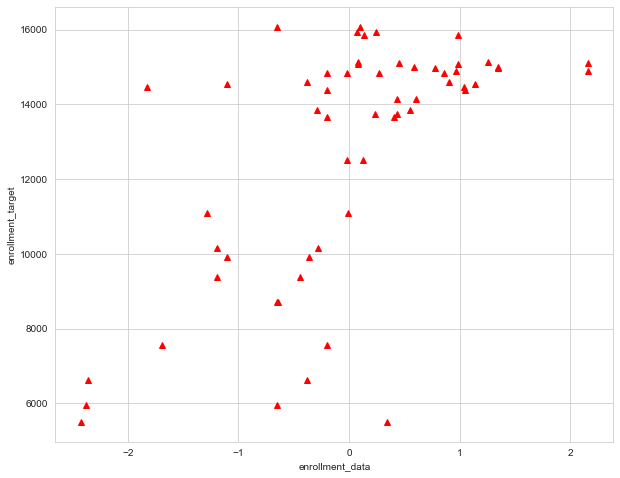

In [68]:
y_pred = LinReg.predict(X)
#print('prediction: ', y_pred, sep='\n')
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()

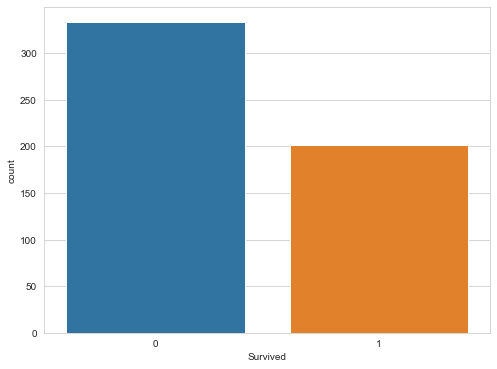

OK  59
NOT OK 119


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[96, 17],
       [23, 42]], dtype=int64)

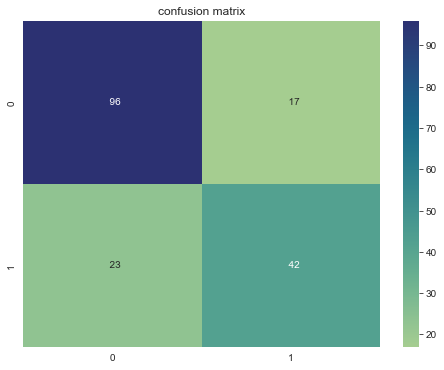

In [19]:
# ---- -------------------- 3. Logistic regression ----------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sb
sb.set_style('whitegrid')

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

sb.countplot(x='Survived', data=train_labels)
plt.show()

log_reg = LogisticRegression()

log_reg.fit(train_features, train_labels)

log_reg.score(test_features, test_labels)  

survival = log_reg.predict(test_features)

print("OK ", sum(survival!=0))
print("NOT OK", sum(survival==0))

## Confusion Matrix
conf_mx = confusion_matrix(test_labels, survival)

sb.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
conf_mx

(120, 4) (30, 4) (120,) (30,)
versicolor
setosa


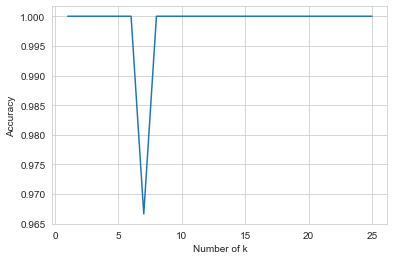

In [21]:
# ============= 4. KNN

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
type(iris)
iris.data
iris.feature_names
iris.target_names
iris.data.shape

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

scores

plt.plot(k_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])